In [8]:
import numpy as np
from polar import polar_bec, polar_design, polar_decode, test_polar, bec_p1, awgn_p1, polar_bec
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(polar_bec(3,0.5))
f = np.asarray([0,0,0,0.5,0,0.5,0.5,0.5])
u,x = polar_decode(np.asarray([0.5,0.5,0,0.5,0.5,0,0,0]),f)

# 1's indicated non-frozen bits that are decoded incorrectly 
print(((f>0)&(u>0)).astype(np.int64))


[0.99609375 0.87890625 0.80859375 0.31640625 0.68359375 0.19140625
 0.12109375 0.00390625]
[0 0 0 0 0 0 0 0]


In [13]:
%%time

# Design and simulate polar code
f = polar_design(polar_bec(10,0.2),0.1)
p=[0.15,0.175,0.2]
M=[10000,1000,1000]
ber, wer = test_polar(n=10, chan=bec_p1, p=p, M=M, f=f)

N = 1024 , chan = CPUDispatcher(<function bec_p1 at 0x7fe160c0b1e0>) , p = [0.15, 0.175, 0.2] , M = [10000, 1000, 1000]
Rate = 0.6826171875
ber = [7.124463519313306e-05, 0.0012589413447782545, 0.015665236051502145]
wer = [0.0005, 0.003, 0.047]
CPU times: user 19.4 s, sys: 104 ms, total: 19.5 s
Wall time: 19.6 s


In [3]:
%%time

# Design and simulate polar code
p=[-1.25, -0.75, -0.25]
M=[500,2000,10000]
ber, wer = test_polar(n=12, chan=awgn_p1, p=p, M=M, T=5000, d=0.1)

N = 4096 , chan = CPUDispatcher(<function awgn_p1 at 0x7fe5c8e18400>) , p = [-1.25, -0.75, -0.25] , M = [500, 2000, 10000]
T = 5000 , dp = -1.25 , d = 0.1
Rate = 0.509765625
ber = [0.023733716475095784, 0.000835727969348659, 3.9080459770114936e-05]
wer = [0.132, 0.008, 0.0006]
CPU times: user 1min 54s, sys: 1.01 s, total: 1min 55s
Wall time: 1min 57s


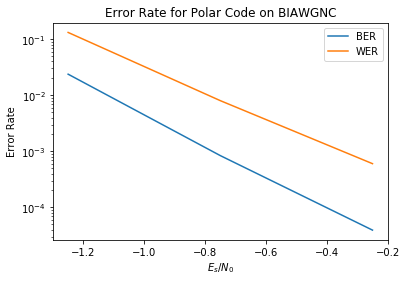

In [4]:
# Plot figure
plt.semilogy(p,ber,label="BER")
plt.semilogy(p,wer,label="WER")
plt.title("Error Rate for Polar Code on BIAWGNC")
plt.xlabel("$E_s/N_0$")
plt.ylabel("Error Rate")
plt.legend()
plt.show()

/Users/hpfister/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  del sys.path[0]
/Users/hpfister/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  del sys.path[0]
/Users/hpfister/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  del sys.path[0]
/Users/hpfister/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


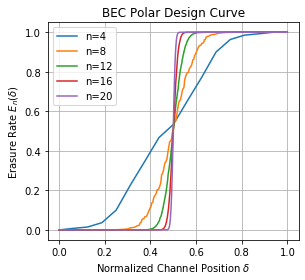

In [2]:
# Plot polarization with length for BEC
e = 0.5
plt.figure(figsize=(4.5,4))
for n in range(4,21,4):
    E = polar_bec(n,e)
    plt.plot(np.arange(2**n)/2**n,np.sort(E),label='n=%d'% n)
    
plt.title('BEC Polar Design Curve')
plt.ylabel("Erasure Rate $E_n (\delta)$")
plt.xlabel("Normalized Channel Position $\delta$")
plt.grid()
plt.legend()
#plt.savefig("bec_cdf.pdf", format="pdf", bbox_inches="tight")
plt.show()